# Import libraries

In [ ]:
import numpy as np
np.random.seed(42)

import os
import glob
import cv2
import datetime
import pandas as pd

import time
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from collections import Counter

from keras.applications import xception
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras import Model
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report

from matplotlib import *
import matplotlib.pyplot as plt

import json

In [ ]:
import sklearn
import collections
import keras
import tensorflow
import matplotlib

In [ ]:
print("numpy version: " + str(np.__version__))
# print("os version: " + str(os.__version__))
# print("glob version: " + str(glob.__version__))
print("cv2 version: " + str(cv2.__version__))
print("pandas version: " + str(pd.__version__))
print("sklearn version: " + str(sklearn.__version__))
# print("collections version: " + str(collections.__version__))
print("keras version: " + str(keras.__version__))
print("tensorflow version: " + str(tensorflow.__version__))
print("matplotlib version: " + str(matplotlib.__version__))
print("json version: " + str(json.__version__))

numpy version: 1.21.6
cv2 version: 4.1.2
pandas version: 1.3.5
sklearn version: 1.0.2
keras version: 2.8.0
tensorflow version: 2.8.2
matplotlib version: 3.2.2
json version: 2.0.9


# Connection with Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Functions

In [ ]:
def get_im_cv2(path):
  
    img = cv2.imread(path)

    resized = cv2.resize(img, (224, 224), cv2.INTER_LINEAR)

    final_image = xception.preprocess_input(resized)

    return final_image

In [ ]:
def load_train():

    X_train = []
    X_train_id = []
    y_train = []

    start_time = time.time()

    print('Read train images')

    folders = [ 'chromista', 
                'protozoa', 
                'animalia', 
                'mollusca', 
                'arachnida', 
                'insecta', 
                'aves', 
                'mammalia', 
                'amphibia', 
                'reptilia', 
                'actinopterygii', 
                'fungi', 
                'plantae']

    for fld in folders:

        index = folders.index(fld)

        print('Load folder {} - train (Index: {})'.format(fld, index))

        for year in (2018, 2019, 2020, 2021):

          print('Reading ' + str(year))
          
          files = os.listdir(os.path.join('/content/drive/MyDrive/natusphera', f'{year}_{fld}', ''))
          

          for fl in files:
              img = get_im_cv2(os.path.join('/content/drive/MyDrive/natusphera', f'{year}_{fld}', fl))
              X_train.append(img)
              X_train_id.append(fld)
              y_train.append(index)

    X_train = np.array(X_train, dtype = 'float32')
    y_train = np.array(y_train, dtype = 'int32')

    print('Read train data time: {} seconds'.format(round(time.time() - start_time, 2)))

    return X_train, y_train, X_train_id

# Load train, test and validation datasets

In [ ]:
x_train, y_train, x_train_id = load_train()

Read train images
Load folder chromista - train (Index: 0)
Reading 2018
Reading 2019
Reading 2020
Reading 2021
Load folder protozoa - train (Index: 1)
Reading 2018
Reading 2019
Reading 2020
Reading 2021
Load folder animalia - train (Index: 2)
Reading 2018
Reading 2019
Reading 2020
Reading 2021
Load folder mollusca - train (Index: 3)
Reading 2018
Reading 2019
Reading 2020
Reading 2021
Load folder arachnida - train (Index: 4)
Reading 2018
Reading 2019
Reading 2020
Reading 2021
Load folder insecta - train (Index: 5)
Reading 2018
Reading 2019
Reading 2020
Reading 2021
Load folder aves - train (Index: 6)
Reading 2018
Reading 2019
Reading 2020
Reading 2021
Load folder mammalia - train (Index: 7)
Reading 2018
Reading 2019
Reading 2020
Reading 2021
Load folder amphibia - train (Index: 8)
Reading 2018
Reading 2019
Reading 2020
Reading 2021
Load folder reptilia - train (Index: 9)
Reading 2018
Reading 2019
Reading 2020
Reading 2021
Load folder actinopterygii - train (Index: 10)
Reading 2018
Readi

In [ ]:
print(Counter(y_train).keys())
print(Counter(y_train).values())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
dict_values([716, 175, 800, 800, 796, 700, 800, 750, 592, 720, 800, 800, 703])


In [ ]:
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

# train is now 80% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=1-train_ratio)

# test is now 10% of the initial data set
# validation is now 10% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

# Modeling

In [ ]:
base_model = xception.Xception(weights = 'imagenet', include_top = False)

In [ ]:
avg = GlobalAveragePooling2D()(base_model.output)

In [ ]:
output = Dense(13, activation = 'softmax')(avg)

In [ ]:
model = Model(inputs = base_model.input, outputs = output)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
optimizer = SGD(lr=0.2, momentum=0.9, decay=0.01)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
229/229 [==============================] - 23s 90ms/step - loss: 3.2777 - accuracy: 0.5166 - val_loss: 2.0833 - val_accuracy: 0.6087
Epoch 2/5
229/229 [==============================] - 20s 86ms/step - loss: 1.1977 - accuracy: 0.6894 - val_loss: 1.7109 - val_accuracy: 0.6098
Epoch 3/5
229/229 [==============================] - 20s 86ms/step - loss: 0.7460 - accuracy: 0.7611 - val_loss: 1.5105 - val_accuracy: 0.6251
Epoch 4/5
229/229 [==============================] - 20s 86ms/step - loss: 0.5737 - accuracy: 0.8074 - val_loss: 1.4739 - val_accuracy: 0.6273
Epoch 5/5
229/229 [==============================] - 20s 86ms/step - loss: 0.4983 - accuracy: 0.8323 - val_loss: 1.4311 - val_accuracy: 0.6262


In [ ]:
for layer in base_model.layers:
  layer.trainable = True

In [ ]:
optimizer = SGD(lr=0.1, momentum=0.9, decay=0.001)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
229/229 [==============================] - 93s 389ms/step - loss: 2.4334 - accuracy: 0.1638 - val_loss: 4.9924 - val_accuracy: 0.1213
Epoch 2/5
229/229 [==============================] - 88s 384ms/step - loss: 2.0867 - accuracy: 0.2941 - val_loss: 2.4459 - val_accuracy: 0.1956
Epoch 3/5
229/229 [==============================] - 88s 384ms/step - loss: 1.7113 - accuracy: 0.4312 - val_loss: 2.0241 - val_accuracy: 0.3607
Epoch 4/5
229/229 [==============================] - 88s 384ms/step - loss: 1.3243 - accuracy: 0.5563 - val_loss: 2.0218 - val_accuracy: 0.3825
Epoch 5/5
229/229 [==============================] - 88s 384ms/step - loss: 1.0238 - accuracy: 0.6588 - val_loss: 1.7025 - val_accuracy: 0.4765


In [ ]:
model.save(os.path.join('/content/drive/MyDrive/natusphera', 'first_model_many')) 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/natusphera/first_model_many/assets


In [ ]:
import tensorflow as tf

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/natusphera/first_model_many/')

In [1]:
# Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history
# Save it under the form of a json file
json.dump(history_dict, open('/content/drive/MyDrive/natusphera/first_model_many/history', 'w'))

In [ ]:
history_dict = json.load(open('/content/drive/MyDrive/natusphera/first_model_many/history', 'r'))

# Results

In [ ]:
def plot_accuracy(history):

  # fig = figure.Figure(figsize=(10,5))

  # plot accuracy
  # plt.subplot(221)
  plt.plot(history['accuracy'], 'mo--', label = 'accuracy')
  plt.plot(history['val_accuracy'], 'co--', label = 'validation accuracy')
  plt.title('Accuracy: Train vs Validation')
  plt.ylabel('accuracy')
  plt.xlabel('epochs')
  plt.legend()

In [ ]:
def plot_loss(history):

  # fig = figure.Figure(figsize=(10,5))

  # plot loss function
  # plt.subplot(222)
  plt.plot(history['loss'], 'mo--', label = 'accuracy')
  plt.plot(history['val_loss'], 'co--', label = 'validation loss')
  plt.title('Loss: Train vs Validation')
  plt.ylabel('loss')
  plt.xlabel('epochs')
  plt.legend()

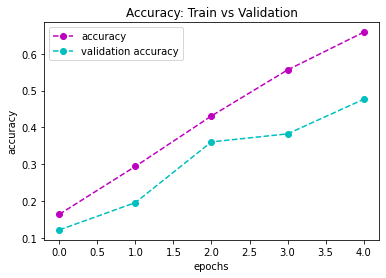

In [ ]:
plot_accuracy(history_dict)

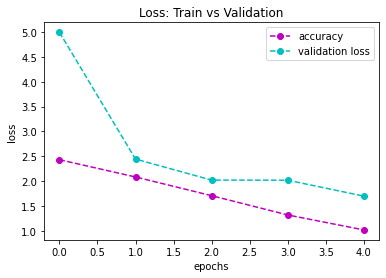

In [ ]:
plot_loss(history_dict)

In [ ]:
classes = [ 'chromista', 
                'protozoa', 
                'animalia', 
                'mollusca', 
                'arachnida', 
                'insecta', 
                'aves', 
                'mammalia', 
                'amphibia', 
                'reptilia', 
                'actinopterygii', 
                'fungi', 
                'plantae']

con_mat = tf.math.confusion_matrix(y_test,pred_labels).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

import seaborn as sns

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.RdPu)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

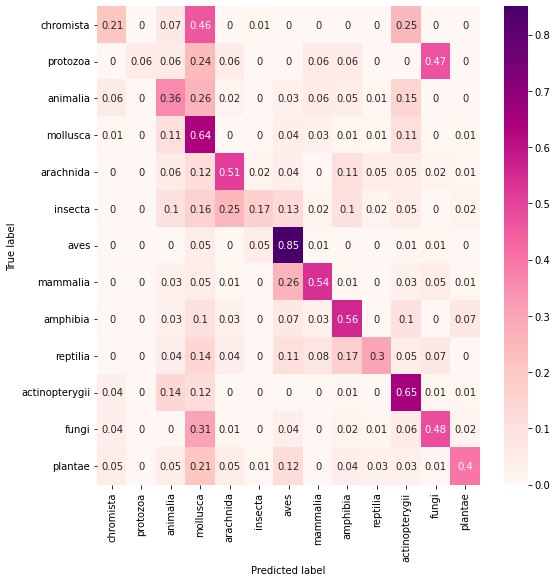

In [ ]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.RdPu)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
test_loss = new_model.evaluate(x_test, y_test)

predictions = new_model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

29/29 [==============================] - 16s 151ms/step - loss: 1.8661 - accuracy: 0.4629


In [ ]:
print(classification_report(y_test,pred_labels))

              precision    recall  f1-score   support

           0       0.53      0.21      0.30        85
           1       1.00      0.06      0.11        17
           2       0.40      0.36      0.38        86
           3       0.22      0.64      0.33        70
           4       0.58      0.51      0.55        82
           5       0.58      0.17      0.27        63
           6       0.52      0.85      0.64        75
           7       0.69      0.54      0.61        74
           8       0.45      0.56      0.50        59
           9       0.70      0.30      0.42        76
          10       0.39      0.65      0.49        69
          11       0.65      0.48      0.55        83
          12       0.74      0.40      0.52        77

    accuracy                           0.46       916
   macro avg       0.57      0.44      0.44       916
weighted avg       0.55      0.46      0.46       916



In [ ]:
report = classification_report(y_test, pred_labels, output_dict=True)
df = pd.DataFrame(report).transpose()
classes.append('accuracy')
classes.append('macro average')
classes.append('weigthed average')
df['classes'] = classes
df = df.reset_index().drop(columns = 'index').set_index('classes')

figure = plt.figure(figsize=(8, 8))
sns.heatmap(df[['precision']], annot=True,cmap=plt.cm.RdPu)
plt.tight_layout()
plt.show()

In [ ]:
classes.append('accuracy')
classes.append('macro average')
classes.append('weigthed average')

In [ ]:
df['classes'] = classes

In [ ]:
df = df.reset_index().drop(columns = 'index').set_index('classes')

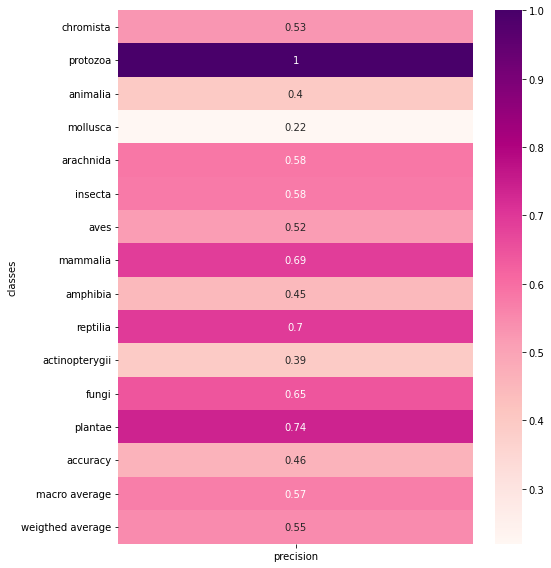

In [ ]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(df[['precision']], annot=True,cmap=plt.cm.RdPu)
plt.tight_layout()
plt.show()

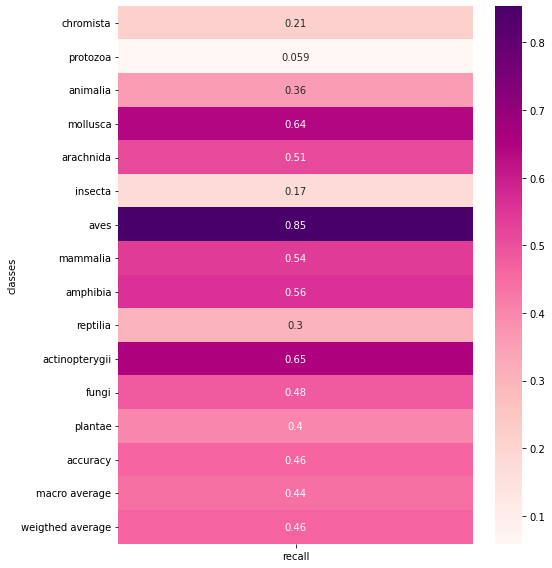

In [ ]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(df[['recall']], annot=True,cmap=plt.cm.RdPu)
plt.tight_layout()
plt.show()

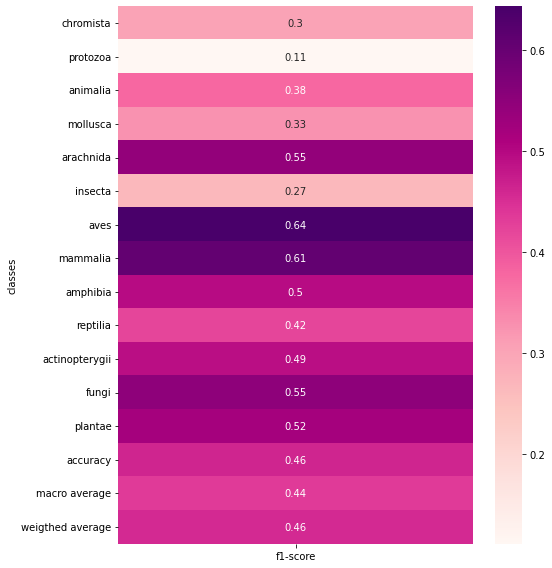

In [ ]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(df[['f1-score']], annot=True,cmap=plt.cm.RdPu)
plt.tight_layout()
plt.show()